## Random Forest 
### AILI WANG 4/5/2021

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
# C:\Capstone program 2021 Spring\Manipulated Data\Cleaned data (three tables) 3-7-21
mydf=pd.read_excel('C:/Capstone program 2021 Spring/Manipulated Data/Random forest/data_for_random_forest.xlsx')

In [43]:
mydf.head()

Unnamed: 0_x           ID  householdID_x  communityID_x  \
0             0  94004113002      940041130         940041   
1             1  94004111002      940041110         940041   
2             2  94004111001      940041110         940041   
3             3  94004112001      940041120         940041   
4             4  94004118001      940041180         940041   

  Receive Wage and Bonus Income  How Much Receive  Yuan/Year Pension  \
0                          2 No               NaN        NaN   1 Yes   
1                          2 No               NaN        NaN   1 Yes   
2                          2 No               NaN        NaN   1 Yes   
3                          2 No               NaN        NaN    0 No   
4                          2 No               NaN        NaN   1 Yes   

  Unemployment Compensation Pension Voucher  ...  \
0                      0 No            0 No  ...   
1                      0 No            0 No  ...   
2                      0 No            0 No  ...   
3                      0 No           3 Yes  ...   
4                      0 No            0 No  ...   

  Understand This Test or Not_dc031_w4_0 Answer of Starting Block 1  \
0                             1 Continue                        9.0   
1                             1 Continue                        9.0   
2                             1 Continue                        9.0   
3                                    NaN                        NaN   
4                             1 Continue                        9.0   

  Answer of Starting Block 2 Answer of Starting Block 3  \
0                        9.0                        5.0   
1                       10.0                        4.0   
2                       10.0                        4.0   
3                        NaN                        NaN   
4                       10.0                        4.0   

  Answer of 2 Correct Block 1 Answer of 2 Correct Block 2  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

  Answer of 2 Correct Block 3  Answer of 3 Correct Block 3_1  \
0                         NaN                            NaN   
1                         NaN                            5.0   
2                         NaN                            5.0   
3                         NaN                            NaN   
4                         NaN                            9.0   

   Answer of 3 Correct Block 3_2  Understand and Accept WRE Test  
0                            NaN                           1 Yes  
1                            5.0                           1 Yes  
2                            5.0                           1 Yes  
3                            NaN                           1 Yes  
4                            9.0                           1 Yes  

[5 rows x 124 columns]

In [44]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19737 entries, 0 to 19736
Columns: 124 entries, Unnamed: 0_x to Understand and Accept WRE Test
dtypes: float64(34), int64(4), object(86)
memory usage: 18.7+ MB


In [128]:
mydf['Any Fraud'].value_counts()

2 No     18268
1 Yes     1456
Name: Any Fraud, dtype: int64

In [130]:
mydf['Any Fraud'].replace('2 No', 0,inplace=True)
mydf['Any Fraud'].replace('1 Yes', 1,inplace=True)

In [131]:
mydf['Any Fraud'].value_counts()

0.0    18268
1.0     1456
Name: Any Fraud, dtype: int64

In [132]:
# 找出数字类型列
numerics = ['int64',  'float64']

num_attr_df = mydf.select_dtypes(include=numerics)

In [133]:
num_attr_df

Unnamed: 0_x            ID  householdID_x  communityID_x  \
0                 0   94004113002      940041130         940041   
1                 1   94004111002      940041110         940041   
2                 2   94004111001      940041110         940041   
3                 3   94004112001      940041120         940041   
4                 4   94004118001      940041180         940041   
...             ...           ...            ...            ...   
19732         19750  294099304001     2940993040        2940993   
19733         19751  294099303002     2940993030        2940993   
19734         19752  294099303001     2940993030        2940993   
19735         19753  294099311001     2940993110        2940993   
19736         19754  294099311002     2940993110        2940993   

       How Much Receive  Yuan/Year  Pension Amount  Pension Voucher Amount  \
0                   NaN        NaN         24000.0                     NaN   
1                   NaN        NaN         50000.0                     NaN   
2                   NaN        NaN         50000.0                     NaN   
3                   NaN        NaN             NaN                   500.0   
4                   NaN        NaN         46200.0                     NaN   
...                 ...        ...             ...                     ...   
19732               NaN        NaN             NaN                     NaN   
19733           40000.0        NaN             NaN                     NaN   
19734            1200.0        NaN             NaN                     NaN   
19735           30000.0        NaN          1400.0                     NaN   
19736               NaN        NaN          1400.0                     NaN   

       Pension Subsidy for the Oldest Old Amount  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
...                                          ...   
19732                                        NaN   
19733                                        NaN   
19734                                        NaN   
19735                                        NaN   
19736                                        NaN   

       Elderly Family Planning Subsidy Amount  ...  Answer of Example 1  \
0                                         NaN  ...                  6.0   
1                                         NaN  ...                  6.0   
2                                         NaN  ...                  5.0   
3                                         NaN  ...                  NaN   
4                                         NaN  ...                  6.0   
...                                       ...  ...                  ...   
19732                                     NaN  ...                  6.0   
19733                                     NaN  ...                  6.0   
19734                                     NaN  ...                  6.0   
19735                                   960.0  ...                  6.0   
19736                                   960.0  ...                 12.0   

       Answer of Example 2  Answer of Starting Block 1  \
0                      5.0                         9.0   
1                      5.0                         9.0   
2                      5.0                         9.0   
3                      NaN                         NaN   
4                      5.0                         9.0   
...                    ...                         ...   
19732                  5.0                         9.0   
19733                  5.0                         9.0   
19734                  5.0                         9.0   
19735                  5.0                         9.0   
19736                  5.0                         NaN   

       Answer of Starting Block 2  Answer 

In [134]:

#找出 Category列
category_attr_df = mydf.select_dtypes(exclude=numerics)

In [135]:
category_attr_df

Receive Wage and Bonus Income Pension Unemployment Compensation  \
0                              2 No   1 Yes                      0 No   
1                              2 No   1 Yes                      0 No   
2                              2 No   1 Yes                      0 No   
3                              2 No    0 No                      0 No   
4                              2 No   1 Yes                      0 No   
...                             ...     ...                       ...   
19732                          2 No    0 No                      0 No   
19733                         1 Yes    0 No                      0 No   
19734                         1 Yes    0 No                      0 No   
19735                         1 Yes   1 Yes                      0 No   
19736                          2 No   1 Yes                      0 No   

      Pension Voucher Pension Subsidy for the Oldest Old  \
0                0 No                               0 No   
1                0 No                               0 No   
2                0 No                               0 No   
3               3 Yes                               0 No   
4                0 No                               0 No   
...               ...                                ...   
19732            0 No                               0 No   
19733            0 No                               0 No   
19734            0 No                               0 No   
19735            0 No                               0 No   
19736            0 No                               0 No   

      Workers’ Industrial Accident Compensation  \
0                                          0 No   
1                                          0 No   
2                                          0 No   
3                                          0 No   
4                                          0 No   
...                                         ...   
19732                                      0 No   
19733                                      0 No   
19734                                      0 No   
19735                                      0 No   
19736                                      0 No   

      Elderly Family Planning Subsidy Medical Aid Other Government Subsidy  \
0                                0 No        0 No                     0 No   
1                                0 No        0 No                     0 No   
2                                0 No        0 No                     0 No   
3                                0 No        0 No                     0 No   
4                                0 No        0 No                     0 No   
...                               ...         ...                      ...   
19732                            0 No        0 No                     0 No   
19733                            0 No        0 No                     0 No   
19734                            0 No        0 No                     0 No   
19735                           6 Yes        0 No                     0 No   
19736                           6 Yes        0 No                    8 Yes   

      Other Income Source  ...  \
0                    0 No  ...   
1                    0 No  ...   
2                    0 No  ...   
3                    0 No  ...   
4                    0 No  ...   
...                   ...  ...   
19732                0 No  ...   
19733                0 No  ...   
19734                0 No  ...   
19735                0 No  ...   
19736                0 No  ...   

                                             I Was Happy  \
0                          4 Most of the Time (5-7 Days)   
1                          2 Some or A Little (1-2 Days)   
2                          2 Some or A Little (1-2 Days)   
3      3 Occasionally or Moderate Amount of Time (3-4...   
4                              1 Rarely or None (<1 Day)   
...                                                  ...   
19732                        

In [136]:
# 将Category列转化为数字列，ONE-HOT 
dummy_df=pd.get_dummies(category_attr_df)

In [137]:
dummy_df

Receive Wage and Bonus Income_1 Yes  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
19732                                    0   
19733                                    1   
19734                                    1   
19735                                    1   
19736                                    0   

       Receive Wage and Bonus Income_2 No  Pension_0 No  Pension_1 Yes  \
0                                       1             0              1   
1                                       1             0              1   
2                                       1             0              1   
3                                       1             1              0   
4                                       1             0              1   
...                                   ...           ...            ...   
19732                                   1             1              0   
19733                                   0             1              0   
19734                                   0             1              0   
19735                                   0             0              1   
19736                                   1             0              1   

       Unemployment Compensation_0 No  Unemployment Compensation_2 Yes  \
0                                   1                                0   
1                                   1                                0   
2                                   1                                0   
3                                   1                                0   
4                                   1                                0   
...                               ...                              ...   
19732                               1                                0   
19733                               1                                0   
19734                               1                                0   
19735                               1                                0   
19736                               1                                0   

       Pension Voucher_0 No  Pension Voucher_3 Yes  \
0                         1                      0   
1                         1                      0   
2                         1                      0   
3                         0                      1   
4                         1                      0   
...                     ...                    ...   
19732                     1                      0   
19733                     1                      0   
19734                     1                      0   
19735                     1                      0   
19736                     1                      0   

       Pension Subsidy for the Oldest Old_0 No  \
0                                            1   
1                                            1   
2                                            1   
3                                            1   
4                                            1   
...                                        ...   
19732                                        1   
19733                                        1   
19734                                        1   
19735                                        1   
19736                                        1   

       Pension Subsidy for the Oldest Old_4 Yes  ...  \
0                                             0  ...   
1                                             0  ...   
2                                             0  ...   
3                                             0  ...   
4                                             0  ...   
...                                         ...  ...   
19732                             

In [140]:
df_ready=pd.concat([num_attr_df, dummy_df], axis=1)

In [141]:
# 重新合成一个新的 DataFrame
df_ready

Unnamed: 0_x            ID  householdID_x  communityID_x  \
0                 0   94004113002      940041130         940041   
1                 1   94004111002      940041110         940041   
2                 2   94004111001      940041110         940041   
3                 3   94004112001      940041120         940041   
4                 4   94004118001      940041180         940041   
...             ...           ...            ...            ...   
19732         19750  294099304001     2940993040        2940993   
19733         19751  294099303002     2940993030        2940993   
19734         19752  294099303001     2940993030        2940993   
19735         19753  294099311001     2940993110        2940993   
19736         19754  294099311002     2940993110        2940993   

       How Much Receive  Yuan/Year  Pension Amount  Pension Voucher Amount  \
0                   NaN        NaN         24000.0                     NaN   
1                   NaN        NaN         50000.0                     NaN   
2                   NaN        NaN         50000.0                     NaN   
3                   NaN        NaN             NaN                   500.0   
4                   NaN        NaN         46200.0                     NaN   
...                 ...        ...             ...                     ...   
19732               NaN        NaN             NaN                     NaN   
19733           40000.0        NaN             NaN                     NaN   
19734            1200.0        NaN             NaN                     NaN   
19735           30000.0        NaN          1400.0                     NaN   
19736               NaN        NaN          1400.0                     NaN   

       Pension Subsidy for the Oldest Old Amount  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
...                                          ...   
19732                                        NaN   
19733                                        NaN   
19734                                        NaN   
19735                                        NaN   
19736                                        NaN   

       Elderly Family Planning Subsidy Amount  ...  \
0                                         NaN  ...   
1                                         NaN  ...   
2                                         NaN  ...   
3                                         NaN  ...   
4                                         NaN  ...   
...                                       ...  ...   
19732                                     NaN  ...   
19733                                     NaN  ...   
19734                                     NaN  ...   
19735                                   960.0  ...   
19736                                   960.0  ...   

       Air Quality Satisfication_2 Very Satisfied  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
19732                                           0   
19733                                           0   
19734                                           0   
19735                                           0   
19736                                           0   

       Air Quality Satisfication_3 Somewhat Satistied  \
0                                                   0   
1                                                   1   
2                                                   1   
3                                                   1   
4                                                   1   
...         

In [76]:
df_ready.to_excel('C:/Capstone program 2021 Spring/Manipulated Data/Random forest/data_with_dummy.xlsx')

In [142]:
df_ready.head()

Unnamed: 0_x           ID  householdID_x  communityID_x  How Much Receive  \
0             0  94004113002      940041130         940041               NaN   
1             1  94004111002      940041110         940041               NaN   
2             2  94004111001      940041110         940041               NaN   
3             3  94004112001      940041120         940041               NaN   
4             4  94004118001      940041180         940041               NaN   

   Yuan/Year  Pension Amount  Pension Voucher Amount  \
0        NaN         24000.0                     NaN   
1        NaN         50000.0                     NaN   
2        NaN         50000.0                     NaN   
3        NaN             NaN                   500.0   
4        NaN         46200.0                     NaN   

   Pension Subsidy for the Oldest Old Amount  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   Elderly Family Planning Subsidy Amount  ...  \
0                                     NaN  ...   
1                                     NaN  ...   
2                                     NaN  ...   
3                                     NaN  ...   
4                                     NaN  ...   

   Air Quality Satisfication_2 Very Satisfied  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Air Quality Satisfication_3 Somewhat Satistied  \
0                                               0   
1                                               1   
2                                               1   
3                                               1   
4                                               1   

   Air Quality Satisfication_4 Not Very Satistied  \
0                                               1   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Air Quality Satisfication_5 Not at All Satisfied  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Understand This Test or Not_dc031_w4_0_1 Continue  \
0                                                  1   
1                                                  1   
2                                                  1   
3                                                  0   
4                                                  1   

   Understand This Test or Not_dc031_w4_0_5 R Seems Confused or Cannot Understand  \
0                                                  0                                
1                                                  0                                
2                                                  0                                
3                                                  0                                
4                                                  0                                

   Understand This Test or Not_dc031_w4_0_8 Don't Know  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   Understand This Test or Not_dc031_w4_0_9 Refused  \
0                                                 0   
1                       

## First try: Fill the Nan with mean 


In [143]:
df_ready.isnull().sum()

Unnamed: 0_x                                                                          0
ID                                                                                    0
householdID_x                                                                         0
communityID_x                                                                         0
How Much Receive                                                                  14893
                                                                                  ...  
Understand This Test or Not_dc031_w4_0_5 R Seems Confused or Cannot Understand        0
Understand This Test or Not_dc031_w4_0_8 Don't Know                                   0
Understand This Test or Not_dc031_w4_0_9 Refused                                      0
Understand and Accept WRE Test_1 Yes                                                  0
Understand and Accept WRE Test_2 No                                                   0
Length: 333, dtype: int64

In [144]:
nulls = df_ready.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])

Unnamed: 0_x 0
ID 0
householdID_x 0
communityID_x 0
How Much Receive 14893
Yuan/Year 19232
Pension Amount 10452
Pension Voucher Amount 19607
Pension Subsidy for the Oldest Old Amount 18785
Elderly Family Planning Subsidy Amount 19164
Other Government Subsidy Amount 18761
Cash at Home 636
Electronic Money 83
Deposit 696
Stock 19536
Percent of Financial Products Controlled by You Not Your Spouse 11208
Loan 62
Credit Card Balance 40
Other Borrowing 69
Any Fraud 13
Fraud Type 17929
Year of Birth 316
Year of Education After Highest Level of Education 8584
Age of Finish Schooling 0
Specific Result from 100-7 6130
Specific Result from dc014_w4_2-7 7702
Specific Result from dc014_w4_3-7 8331
Specific Result from dc014_w4_4-7 8726
Specific Result from dc014_w4_5-7 9094
Answer of Example 1 5163
Answer of Example 2 4749
Answer of Starting Block 1 6913
Answer of Starting Block 2 7398
Answer of Starting Block 3 10170
Answer of 2 Correct Block 1 14926
Answer of 2 Correct Block 2 14475
Answer of 2 Co

Understand This Test or Not_dc031_w4_0_1 Continue 0
Understand This Test or Not_dc031_w4_0_5 R Seems Confused or Cannot Understand 0
Understand This Test or Not_dc031_w4_0_8 Don't Know 0
Understand This Test or Not_dc031_w4_0_9 Refused 0
Understand and Accept WRE Test_1 Yes 0
Understand and Accept WRE Test_2 No 0


In [147]:
for column in list(df_ready.columns[df_ready.isnull().sum() > 0]):
    mean_val = df_ready[column].mean()
    df_ready[column].fillna(mean_val, inplace=True)

In [148]:
df_ready.head()

Unnamed: 0_x           ID  householdID_x  communityID_x  How Much Receive  \
0             0  94004113002      940041130         940041      28190.009909   
1             1  94004111002      940041110         940041      28190.009909   
2             2  94004111001      940041110         940041      28190.009909   
3             3  94004112001      940041120         940041      28190.009909   
4             4  94004118001      940041180         940041      28190.009909   

     Yuan/Year  Pension Amount  Pension Voucher Amount  \
0  5479.140594    24000.000000             1561.715385   
1  5479.140594    50000.000000             1561.715385   
2  5479.140594    50000.000000             1561.715385   
3  5479.140594    10801.783849              500.000000   
4  5479.140594    46200.000000             1561.715385   

   Pension Subsidy for the Oldest Old Amount  \
0                                  944.02521   
1                                  944.02521   
2                                  944.02521   
3                                  944.02521   
4                                  944.02521   

   Elderly Family Planning Subsidy Amount  ...  \
0                             1069.533682  ...   
1                             1069.533682  ...   
2                             1069.533682  ...   
3                             1069.533682  ...   
4                             1069.533682  ...   

   Air Quality Satisfication_2 Very Satisfied  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Air Quality Satisfication_3 Somewhat Satistied  \
0                                               0   
1                                               1   
2                                               1   
3                                               1   
4                                               1   

   Air Quality Satisfication_4 Not Very Satistied  \
0                                               1   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Air Quality Satisfication_5 Not at All Satisfied  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Understand This Test or Not_dc031_w4_0_1 Continue  \
0                                                  1   
1                                                  1   
2                                                  1   
3                                                  0   
4                                                  1   

   Understand This Test or Not_dc031_w4_0_5 R Seems Confused or Cannot Understand  \
0                                                  0                                
1                                                  0                                
2                                                  0                                
3                                                  0                                
4                                                  0                                

   Understand This Test or Not_dc031_w4_0_8 Don't Know  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   Understand This Test or Not_dc031_w4_0_9 Refused  \
0                                                 0   
1           

In [149]:
df_ready['Any Fraud'].value_counts()

0.000000    18268
1.000000     1456
0.073819       13
Name: Any Fraud, dtype: int64

In [150]:
# df = df[df.line_race != 0]
# df_ready_1=df_ready[(df_ready['Any Fraud']==0) or (df_ready['Any Fraud']==1)]
df_ready.drop(df_ready.loc[(df_ready['Any Fraud']!=0) & (df_ready['Any Fraud']!=1 )].index, inplace=True)

In [151]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19724 entries, 0 to 19736
Columns: 333 entries, Unnamed: 0_x to Understand and Accept WRE Test_2 No
dtypes: float64(35), int64(4), uint8(294)
memory usage: 11.5 MB


In [152]:
df_ready.head()

Unnamed: 0_x           ID  householdID_x  communityID_x  How Much Receive  \
0             0  94004113002      940041130         940041      28190.009909   
1             1  94004111002      940041110         940041      28190.009909   
2             2  94004111001      940041110         940041      28190.009909   
3             3  94004112001      940041120         940041      28190.009909   
4             4  94004118001      940041180         940041      28190.009909   

     Yuan/Year  Pension Amount  Pension Voucher Amount  \
0  5479.140594    24000.000000             1561.715385   
1  5479.140594    50000.000000             1561.715385   
2  5479.140594    50000.000000             1561.715385   
3  5479.140594    10801.783849              500.000000   
4  5479.140594    46200.000000             1561.715385   

   Pension Subsidy for the Oldest Old Amount  \
0                                  944.02521   
1                                  944.02521   
2                                  944.02521   
3                                  944.02521   
4                                  944.02521   

   Elderly Family Planning Subsidy Amount  ...  \
0                             1069.533682  ...   
1                             1069.533682  ...   
2                             1069.533682  ...   
3                             1069.533682  ...   
4                             1069.533682  ...   

   Air Quality Satisfication_2 Very Satisfied  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Air Quality Satisfication_3 Somewhat Satistied  \
0                                               0   
1                                               1   
2                                               1   
3                                               1   
4                                               1   

   Air Quality Satisfication_4 Not Very Satistied  \
0                                               1   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Air Quality Satisfication_5 Not at All Satisfied  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Understand This Test or Not_dc031_w4_0_1 Continue  \
0                                                  1   
1                                                  1   
2                                                  1   
3                                                  0   
4                                                  1   

   Understand This Test or Not_dc031_w4_0_5 R Seems Confused or Cannot Understand  \
0                                                  0                                
1                                                  0                                
2                                                  0                                
3                                                  0                                
4                                                  0                                

   Understand This Test or Not_dc031_w4_0_8 Don't Know  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   Understand This Test or Not_dc031_w4_0_9 Refused  \
0                                                 0   
1           

In [153]:
df_ready['Any Fraud'].value_counts()

0.0    18268
1.0     1456
Name: Any Fraud, dtype: int64

## Single Decision tree

### Split Data into Training and Testing Set

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Set random seed to ensure reproducible runs
RSEED = 10

In [281]:
df=pd.read_excel('C:/Capstone program 2021 Spring/Manipulated Data/Random forest/data_with_dummy.xlsx')

In [282]:
df.head()

Unnamed: 0  Unnamed: 0_x           ID  householdID_x  communityID_x  \
0           0             0  94004113002      940041130         940041   
1           1             1  94004111002      940041110         940041   
2           2             2  94004111001      940041110         940041   
3           3             3  94004112001      940041120         940041   
4           4             4  94004118001      940041180         940041   

   How Much Receive  Yuan/Year  Pension Amount  Pension Voucher Amount  \
0               NaN        NaN         24000.0                     NaN   
1               NaN        NaN         50000.0                     NaN   
2               NaN        NaN         50000.0                     NaN   
3               NaN        NaN             NaN                   500.0   
4               NaN        NaN         46200.0                     NaN   

   Pension Subsidy for the Oldest Old Amount  ...  \
0                                        NaN  ...   
1                                        NaN  ...   
2                                        NaN  ...   
3                                        NaN  ...   
4                                        NaN  ...   

   Air Quality Satisfication_2 Very Satisfied  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Air Quality Satisfication_3 Somewhat Satistied  \
0                                               0   
1                                               1   
2                                               1   
3                                               1   
4                                               1   

   Air Quality Satisfication_4 Not Very Satistied  \
0                                               1   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Air Quality Satisfication_5 Not at All Satisfied  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Understand This Test or Not_dc031_w4_0_1 Continue  \
0                                                  1   
1                                                  1   
2                                                  1   
3                                                  0   
4                                                  1   

   Understand This Test or Not_dc031_w4_0_5 R Seems Confused or Cannot Understand  \
0                                                  0                                
1                                                  0                                
2                                                  0                                
3                                                  0                                
4                                                  0                                

   Understand This Test or Not_dc031_w4_0_8 Don't Know  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   Understand This Test or Not_dc031_w4_0_9 Refused  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

  

In [283]:
df= df.drop(['Unnamed: 0_x'], axis=1)

In [284]:
df= df.drop(['Unnamed: 0'], axis=1)

In [285]:
df=df.drop(['Any Fraud_1 Yes'], axis=1)

In [286]:
df=df.drop(['Any Fraud_2 No'], axis=1)

In [287]:
df=df.drop(['Fraud Type'], axis=1)

In [288]:
df=df.drop(['hd005_w4_1 Yes'], axis=1)

In [289]:
df=df.drop(['hd005_w4_2 No'], axis=1)

In [290]:
df=df.drop(['hd005_w4_999 Refused to Answer'], axis=1)

In [291]:
df.head()

ID  householdID_x  communityID_x  How Much Receive  Yuan/Year  \
0  94004113002      940041130         940041               NaN        NaN   
1  94004111002      940041110         940041               NaN        NaN   
2  94004111001      940041110         940041               NaN        NaN   
3  94004112001      940041120         940041               NaN        NaN   
4  94004118001      940041180         940041               NaN        NaN   

   Pension Amount  Pension Voucher Amount  \
0         24000.0                     NaN   
1         50000.0                     NaN   
2         50000.0                     NaN   
3             NaN                   500.0   
4         46200.0                     NaN   

   Pension Subsidy for the Oldest Old Amount  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   Elderly Family Planning Subsidy Amount  Other Government Subsidy Amount  \
0                                     NaN                              NaN   
1                                     NaN                              NaN   
2                                     NaN                              NaN   
3                                     NaN                              NaN   
4                                     NaN                              NaN   

   ...  Air Quality Satisfication_2 Very Satisfied  \
0  ...                                           0   
1  ...                                           0   
2  ...                                           0   
3  ...                                           0   
4  ...                                           0   

   Air Quality Satisfication_3 Somewhat Satistied  \
0                                               0   
1                                               1   
2                                               1   
3                                               1   
4                                               1   

   Air Quality Satisfication_4 Not Very Satistied  \
0                                               1   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Air Quality Satisfication_5 Not at All Satisfied  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Understand This Test or Not_dc031_w4_0_1 Continue  \
0                                                  1   
1                                                  1   
2                                                  1   
3                                                  0   
4                                                  1   

   Understand This Test or Not_dc031_w4_0_5 R Seems Confused or Cannot Understand  \
0                                                  0                                
1                                                  0                                
2                                                  0                                
3                                                  0                                
4                                                  0                                

   Understand This Test or Not_dc031_w4_0_8 Don't Know  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   Understand This Test or No

In [292]:
for column in list(df.columns[df.isnull().sum() > 0]):
    mean_val = df[column].mean()
    df[column].fillna(mean_val, inplace=True)

In [293]:
df.head()

ID  householdID_x  communityID_x  How Much Receive    Yuan/Year  \
0  94004113002      940041130         940041      28190.009909  5479.140594   
1  94004111002      940041110         940041      28190.009909  5479.140594   
2  94004111001      940041110         940041      28190.009909  5479.140594   
3  94004112001      940041120         940041      28190.009909  5479.140594   
4  94004118001      940041180         940041      28190.009909  5479.140594   

   Pension Amount  Pension Voucher Amount  \
0    24000.000000             1561.715385   
1    50000.000000             1561.715385   
2    50000.000000             1561.715385   
3    10801.783849              500.000000   
4    46200.000000             1561.715385   

   Pension Subsidy for the Oldest Old Amount  \
0                                  944.02521   
1                                  944.02521   
2                                  944.02521   
3                                  944.02521   
4                                  944.02521   

   Elderly Family Planning Subsidy Amount  Other Government Subsidy Amount  \
0                             1069.533682                      3079.328689   
1                             1069.533682                      3079.328689   
2                             1069.533682                      3079.328689   
3                             1069.533682                      3079.328689   
4                             1069.533682                      3079.328689   

   ...  Air Quality Satisfication_2 Very Satisfied  \
0  ...                                           0   
1  ...                                           0   
2  ...                                           0   
3  ...                                           0   
4  ...                                           0   

   Air Quality Satisfication_3 Somewhat Satistied  \
0                                               0   
1                                               1   
2                                               1   
3                                               1   
4                                               1   

   Air Quality Satisfication_4 Not Very Satistied  \
0                                               1   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Air Quality Satisfication_5 Not at All Satisfied  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Understand This Test or Not_dc031_w4_0_1 Continue  \
0                                                  1   
1                                                  1   
2                                                  1   
3                                                  0   
4                                                  1   

   Understand This Test or Not_dc031_w4_0_5 R Seems Confused or Cannot Understand  \
0                                                  0                                
1                                                  0                                
2                                                  0                                
3                                                  0                                
4                                                  0                                

   Understand This Test or Not_dc031_w4_0_8 Don't Know  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   Understand Thi

In [294]:
df['Any Fraud'].value_counts()

0.000000    18268
1.000000     1456
0.073819       13
Name: Any Fraud, dtype: int64

In [295]:
df.drop(df.loc[(df['Any Fraud']!=0) & (df['Any Fraud']!=1 )].index, inplace=True)

In [296]:
df['Any Fraud'].value_counts()

0.0    18268
1.0     1456
Name: Any Fraud, dtype: int64

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19724 entries, 0 to 19736
Columns: 328 entries, ID to Understand and Accept WRE Test_2 No
dtypes: float64(34), int64(294)
memory usage: 49.5 MB


In [299]:
df.to_excel('C:/Capstone program 2021 Spring/Manipulated Data/Random forest/data_for_decision_tree_0403.xlsx')

## when restart the program, can start from this step

In [1]:
# when restart the program, can start from this step

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel('C:/Capstone program 2021 Spring/Manipulated Data/Random forest/data_for_decision_tree_0403.xlsx')

In [2]:
df.head()

Unnamed: 0           ID  householdID_x  communityID_x  How Much Receive  \
0           0  94004113002      940041130         940041      28190.009909   
1           1  94004111002      940041110         940041      28190.009909   
2           2  94004111001      940041110         940041      28190.009909   
3           3  94004112001      940041120         940041      28190.009909   
4           4  94004118001      940041180         940041      28190.009909   

     Yuan/Year  Pension Amount  Pension Voucher Amount  \
0  5479.140594    24000.000000             1561.715385   
1  5479.140594    50000.000000             1561.715385   
2  5479.140594    50000.000000             1561.715385   
3  5479.140594    10801.783849              500.000000   
4  5479.140594    46200.000000             1561.715385   

   Pension Subsidy for the Oldest Old Amount  \
0                                  944.02521   
1                                  944.02521   
2                                  944.02521   
3                                  944.02521   
4                                  944.02521   

   Elderly Family Planning Subsidy Amount  ...  \
0                             1069.533682  ...   
1                             1069.533682  ...   
2                             1069.533682  ...   
3                             1069.533682  ...   
4                             1069.533682  ...   

   Air Quality Satisfication_2 Very Satisfied  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Air Quality Satisfication_3 Somewhat Satistied  \
0                                               0   
1                                               1   
2                                               1   
3                                               1   
4                                               1   

   Air Quality Satisfication_4 Not Very Satistied  \
0                                               1   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Air Quality Satisfication_5 Not at All Satisfied  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Understand This Test or Not_dc031_w4_0_1 Continue  \
0                                                  1   
1                                                  1   
2                                                  1   
3                                                  0   
4                                                  1   

   Understand This Test or Not_dc031_w4_0_5 R Seems Confused or Cannot Understand  \
0                                                  0                                
1                                                  0                                
2                                                  0                                
3                                                  0                                
4                                                  0                                

   Understand This Test or Not_dc031_w4_0_8 Don't Know  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   Understand This Test or Not_dc031_w4_0_9 Refused  \
0                                                 0   
1                       

In [3]:
df= df.drop(['Unnamed: 0'], axis=1)

In [4]:
df['Any Fraud'].value_counts()

0    18268
1     1456
Name: Any Fraud, dtype: int64

In [268]:
#df = df.rename(columns = {'Any Fraud': 'label'})
#df['label'].value_counts()

0.0    18268
1.0     1456
Name: label, dtype: int64

In [269]:
# from sklearn.model_selection import train_test_split

# Extract the labels
#labels = np.array(df.pop('label'))
# 30% examples in test data
# train, test, train_labels, test_labels = train_test_split(df, labels, stratify = labels,test_size = 0.3,random_state = RSEED)                                                                                                                                                                          

In [5]:
target='Any Fraud'
IDcol='ID'
HouseIDcol='househouldID_x'

#Then select the sample feature and category output, the sample feature are the columns that removes the ID and output category
x_columns = [x for x in df.columns if x not in [target,IDcol,HouseIDcol]]
X = df[x_columns]
y = df['Any Fraud']

In [6]:
# Set random seed to ensure reproducible runs
RSEED = 10

In [7]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(X, y, stratify = y,test_size = 0.3,random_state = RSEED)                                          

In [8]:
# Features for feature importances
features = list(train.columns)

In [9]:
train.shape

(13806, 326)

In [10]:
test.shape

(5918, 326)

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=RSEED)

# Train tree
tree.fit(train, train_labels)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 2405 nodes with maximum depth 44.


In [12]:
# Make probability predictions
train_probs = tree.predict_proba(train)[:, 1]
probs = tree.predict_proba(test)[:, 1]

train_predictions = tree.predict(train)
predictions = tree.predict(test)

In [13]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(test_labels, probs)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.52012945072994


In [14]:
print(f'Baseline ROC AUC: {roc_auc_score(test_labels, [1 for _ in range(len(test_labels))])}')

Baseline ROC AUC: 0.5


### Feature Importances
Finally, we can take a look at the features considered most important by the Decision Tree. The values are computed by summing the reduction in Gini Impurity over all of the nodes of the tree in which the feature is used.

In [15]:
fi = pd.DataFrame({'feature': features,
                   'importance': tree.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head(15)

feature  importance
4                                      Pension Amount    0.045363
9                                        Cash at Home    0.038580
17                                      Year of Birth    0.037456
0                                       householdID_x    0.029655
1                                       communityID_x    0.027362
19                            Age of Finish Schooling    0.025118
2                                    How Much Receive    0.020570
11                                            Deposit    0.017556
21                  Specific Result from dc014_w4_2-7    0.016666
32                        Answer of 2 Correct Block 3    0.014191
24                  Specific Result from dc014_w4_5-7    0.013710
29                         Answer of Starting Block 3    0.013361
18  Year of Education After Highest Level of Educa...    0.012736
10                                   Electronic Money    0.012217
30                        Answer of 2 Correct Block 1    0.011981

## Visualize Single Decison Tree

In [28]:
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
from subprocess import call
from IPython.display import Image

# Save tree as dot file
export_graphviz(tree, 'tree.dot', rounded = True, 
                feature_names = features, max_depth = 5,
                class_names = ['No Fraud', 'Any Fraud'], filled = True)

# Convert to png
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=300'])

# Visualize
Image(filename='tree.png')



In [30]:
# Setting dpi = 300 to make image clearer than default
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)


# You can save your plot if you want
fig.savefig('imagename.png')

### Decision tree result analysis
1. pension amount <=29950 True--
   lend money to others_No True  
   Location of Residential address-Rural True
   Answer of starting block 1(Number Series problem,mean=8.96,max=50) <=7.487 True
   class= Any Fraud, sample=3
   
2.  pension amount <=29950 True--
   lend money to others_No True   
   Location of Residential address-Rural True
   Answer of starting block 1(Number Series problem,mean=8.96,max=50) <=7.487 False
   Ever being a Educated Younth in a Poor Rural Area_Yes False
 class= Any Fraud, sample=11,spliting spot:   Answer of starting block 1(Number Series problem,mean=8.96,max=50) <=9.888 
 
 3.pension amount <=29950 True--
   lend money to others_No False
   Own stock_Yes False
   Answer of starting block 1(Number Series problem,mean=8.96,max=50) <=8.981 True
   Location of Residential address_Urban-Rural Integration False
   class= Any Fraud, sample=4
   

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from  sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics


In [33]:
#不管任何参数，都用默认的，拟合下数据看看
rf0 = RandomForestClassifier(oob_score=True, random_state=10)
rf0.fit(X,y)
print (rf0.oob_score_)
y_predprob = rf0.predict_proba(X)[:,1]
print("AUC Score (Train): %f" % metrics.roc_auc_score(y,y_predprob))
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)


0.9261813019671467
AUC Score (Train): 1.000000


### Random Forest Parameters Adjustment

#### Finding the best number of n_estimators

In [34]:
#首先对n_estimators进行网格搜索, using cv_results instead of grid_scores
param_test1= {'n_estimators':range(10,101,10)}
gsearch1= GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                 min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10),
                       param_grid =param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(X,y)
gsearch1.cv_results_,gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.26756129, 0.43115168, 0.6722301 , 0.75240221, 1.02059913,
         1.09886751, 1.47019434, 1.54535713, 1.66327853, 1.73363056]),
  'std_fit_time': array([0.01193503, 0.00887282, 0.06798161, 0.00765668, 0.10120854,
         0.03558838, 0.08026941, 0.0575603 , 0.1332416 , 0.01257099]),
  'mean_score_time': array([0.01896915, 0.0295352 , 0.03609395, 0.03528018, 0.04253111,
         0.05246797, 0.06153903, 0.06176372, 0.06012206, 0.06578784]),
  'std_score_time': array([0.00409622, 0.00291336, 0.01003381, 0.01006345, 0.00774141,
         0.01000356, 0.01322125, 0.00564768, 0.007006  , 0.00388314]),
  'param_n_estimators': masked_array(data=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 10},
   {'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_e

#### Finding the best number of max_depth and min_samples_split

In [37]:
#这样我们得到了最佳的弱学习器迭代次数，接着我们对决策树最大深度max_depth和内部节点再划分所需最小样本数min_samples_split进行网格搜索。
param_test2= {'max_depth':range(3,14,2), 'min_samples_split':range(50,201,20)}
gsearch2= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 80,
                                 min_samples_leaf=20,max_features='sqrt' ,oob_score=True,random_state=10),
   param_grid = param_test2,scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X,y)
gsearch2.cv_results_,gsearch2.best_params_, gsearch2.best_score_

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'mean_fit_time': array([1.73986835, 1.82147975, 1.73472795, 1.84875717, 1.75451307,
         1.7979764 , 1.72640524, 1.85156078, 2.17796493, 2.03080502,
         2.09191723, 2.10929484, 2.06712375, 2.16793046, 2.58631797,
         2.68433743, 3.17427359, 3.01904917, 2.43002286, 2.52440209,
         2.59196539, 2.50526252, 2.43282847, 2.39948211, 3.13668909,
         3.14641132, 2.90473228, 2.80379076, 2.97923803, 3.39974718,
         2.87208648, 2.98745942, 3.24476337, 3.10986052, 3.15033088,
         3.17778749, 3.03785329, 2.93804369, 3.00127196, 3.00533667,
         3.35957127, 3.32030559, 3.60077   , 3.31207166, 3.23177986,
         3.34699769, 3.26084599, 3.20056281]),
  'std_fit_time': array([0.12917363, 0.17967683, 0.08359767, 0.16957811, 0.09508009,
         0.15474255, 0.01005646, 0.16106265, 0.05827142, 0.06725104,
         0.19217146, 0.16953838, 0.0233981 , 0.22235269, 0.22539367,
         0.19214095, 0.2842295 , 0.2221337 , 0.10193121, 0.11395129,
         0.34324047, 0.

In [39]:
#已经取了三个最优参数，看看现在模型的袋外分数：
rf1= RandomForestClassifier(n_estimators= 80, max_depth=11, min_samples_split=170,
                                 min_samples_leaf=20,max_features='sqrt' ,oob_score=True,random_state=10)
rf1.fit(X,y)
print (rf1.oob_score_)

0.9261813019671467


#### Finding the best number of min_sample_split and min_samples_leaf

In [40]:
#再对内部节点再划分所需最小样本数min_samples_split和叶子节点最少样本数min_samples_leaf一起调参
param_test3= {'min_samples_split':range(80,200,20), 'min_samples_leaf':range(10,80,10)}
gsearch3= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 80,max_depth=11,
                                 max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test3,scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(X,y)
gsearch3.cv_results_,gsearch3.best_params_, gsearch3.best_score_


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'mean_fit_time': array([3.03001628, 2.98815002, 2.95832257, 2.95696082, 2.99702044,
         2.95040784, 2.9999959 , 2.99941959, 2.96312704, 2.94328413,
         2.87518868, 2.97295527, 3.01162472, 2.9293992 , 2.98432188,
         2.99679375, 2.930406  , 2.87075424, 3.00939445, 2.96830359,
         2.91765189, 2.82562509, 2.87542148, 2.84244423, 2.94438181,
         2.92336125, 2.86299491, 2.90508738, 2.85984797, 2.85711966,
         2.85630279, 2.88628716, 2.91751103, 2.78792648, 2.78646765,
         2.82791724, 2.88932114, 2.86832051, 2.81046281, 2.83325038,
         2.83075695, 2.78622785]),
  'std_fit_time': array([0.08399215, 0.04696877, 0.08334132, 0.11471399, 0.25606103,
         0.21815509, 0.12189664, 0.1725712 , 0.25532122, 0.19327348,
         0.13228456, 0.25151893, 0.21286983, 0.1365603 , 0.22129398,
         0.24898869, 0.16348932, 0.06306981, 0.147209  , 0.13085978,
         0.12382967, 0.09939206, 0.24017736, 0.10670661, 0.2352243 ,
         0.20847411, 0.12724041, 0.

### Finding the best number of max_features

In [42]:
#最后我们再对最大特征数max_features做调参:
param_test4= {'max_features':range(3,12,2)}
gsearch4= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 80,max_depth=11, min_samples_split=140,
                                 min_samples_leaf=40 ,oob_score=True, random_state=10),
   param_grid = param_test4,scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(X,y)
gsearch4.cv_results_,gsearch4.best_params_, gsearch4.best_score_

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'mean_fit_time': array([1.75018678, 1.92533689, 1.99361544, 2.22528811, 2.38881245]),
  'std_fit_time': array([0.07755044, 0.16898569, 0.0667086 , 0.14733968, 0.1377217 ]),
  'mean_score_time': array([0.05841718, 0.06953621, 0.06442208, 0.07078738, 0.07152629]),
  'std_score_time': array([0.00177118, 0.01416156, 0.00310544, 0.00974743, 0.01095753]),
  'param_max_features': masked_array(data=[3, 5, 7, 9, 11],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_features': 3},
   {'max_features': 5},
   {'max_features': 7},
   {'max_features': 9},
   {'max_features': 11}],
  'split0_test_score': array([0.70287422, 0.69604839, 0.70093406, 0.70626174, 0.71075336]),
  'split1_test_score': array([0.66716793, 0.66083208, 0.6674021 , 0.66957174, 0.67120249]),
  'split2_test_score': array([0.66966437, 0.66791888, 0.6674416 , 0.66399483, 0.6665209 ]),
  'split3_test_score': array([0.51643095, 0.51402488, 0.50655963, 0

In [43]:
# Using the best parameters we searched for, let’s take a look at the final model fit
rf2= RandomForestClassifier(n_estimators= 80, max_depth=11, min_samples_split=140,
                                 min_samples_leaf=40,max_features=3 ,oob_score=True, random_state=10)
rf2.fit(X,y)
print(rf2.oob_score_)

0.9261813019671467


In [45]:
# Extract feature importances
fr = pd.DataFrame({'feature': features,
                   'importance': rf2.feature_importances_}).\
                    sort_values('importance', ascending = False)
# Display
fr.head(15)

feature  importance
4                                       Pension Amount    0.054574
163               Record Huko_2 Non-agricultural Hukou    0.029507
112            Location of Residential Address_3 Rural    0.023607
97                           Lend Money to Others_2 No    0.019710
10                                    Electronic Money    0.018488
96                          Lend Money to Others_1 Yes    0.018399
162                   Record Huko_1 Agricultural Hukou    0.018370
23                   Specific Result from dc014_w4_4-7    0.018230
19                             Age of Finish Schooling    0.017447
209  Whether any of the Following Apply: Respondent...    0.016080
13   Percent of Financial Products Controlled by Yo...    0.016009
22                   Specific Result from dc014_w4_3-7    0.015750
1                                        communityID_x    0.015207
27                          Answer of Starting Block 1    0.014966
25                                 Answer of Example 1    0.013970

## Second method

## Random Forest Optimization through Random Search

In [47]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit 
rs.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                     

In [48]:
rs.best_params_

{'n_estimators': 153,
 'min_samples_split': 10,
 'max_leaf_nodes': 10,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': True}

### Use Best Model

In [49]:
best_model = rs.best_estimator_

In [50]:
train_rf_predictions = best_model.predict(train)
train_rf_probs = best_model.predict_proba(train)[:, 1]

rf_predictions = best_model.predict(test)
rf_probs = best_model.predict_proba(test)[:, 1]

In [51]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 19
Average maximum depth 5


In [54]:
estimator = best_model.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_optimized_forest.dot', rounded = True, 
                feature_names=train.columns, max_depth = 5, 
                class_names = ['No Fraud', 'Any Fraud'], filled = True)

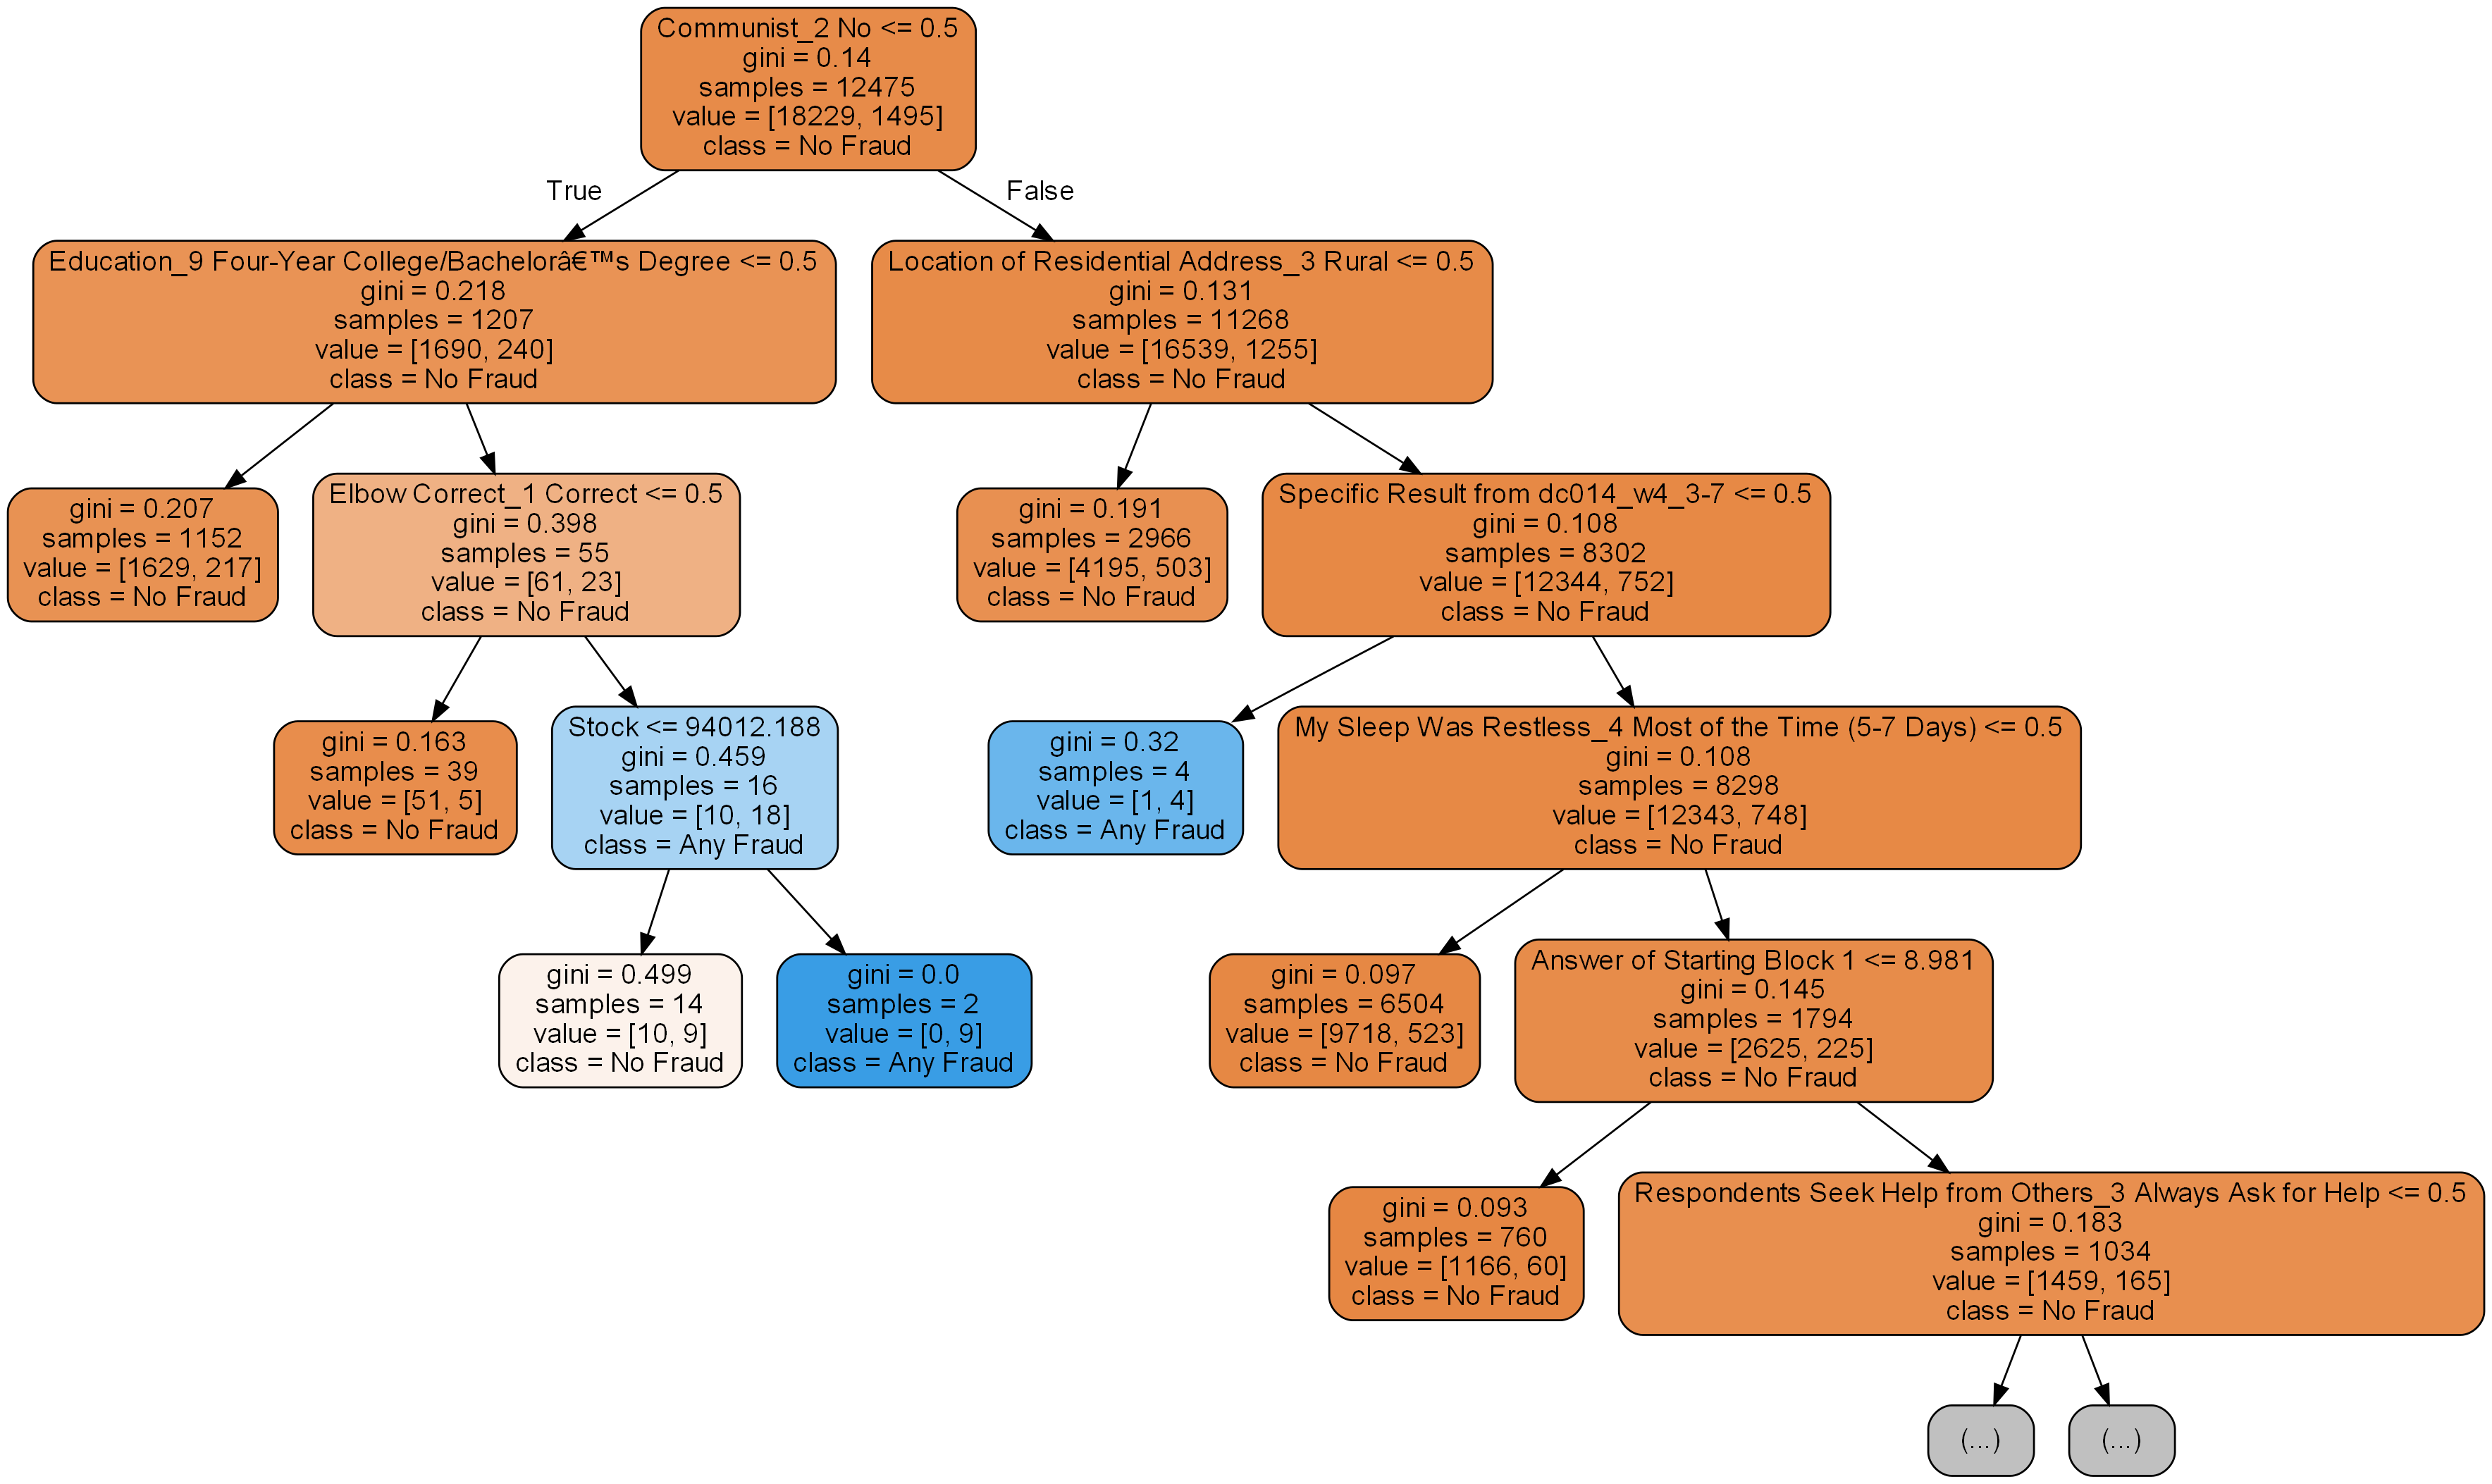

In [55]:
call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest.png', '-Gdpi=200'])
Image('tree_from_optimized_forest.png')

In [ ]:
estimator = best_model.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_optimized_forest.dot', rounded = True, 
                feature_names=train.columns, max_depth = 4, 
                class_names = ['No Fraud', 'Any Fraud'], filled = True)

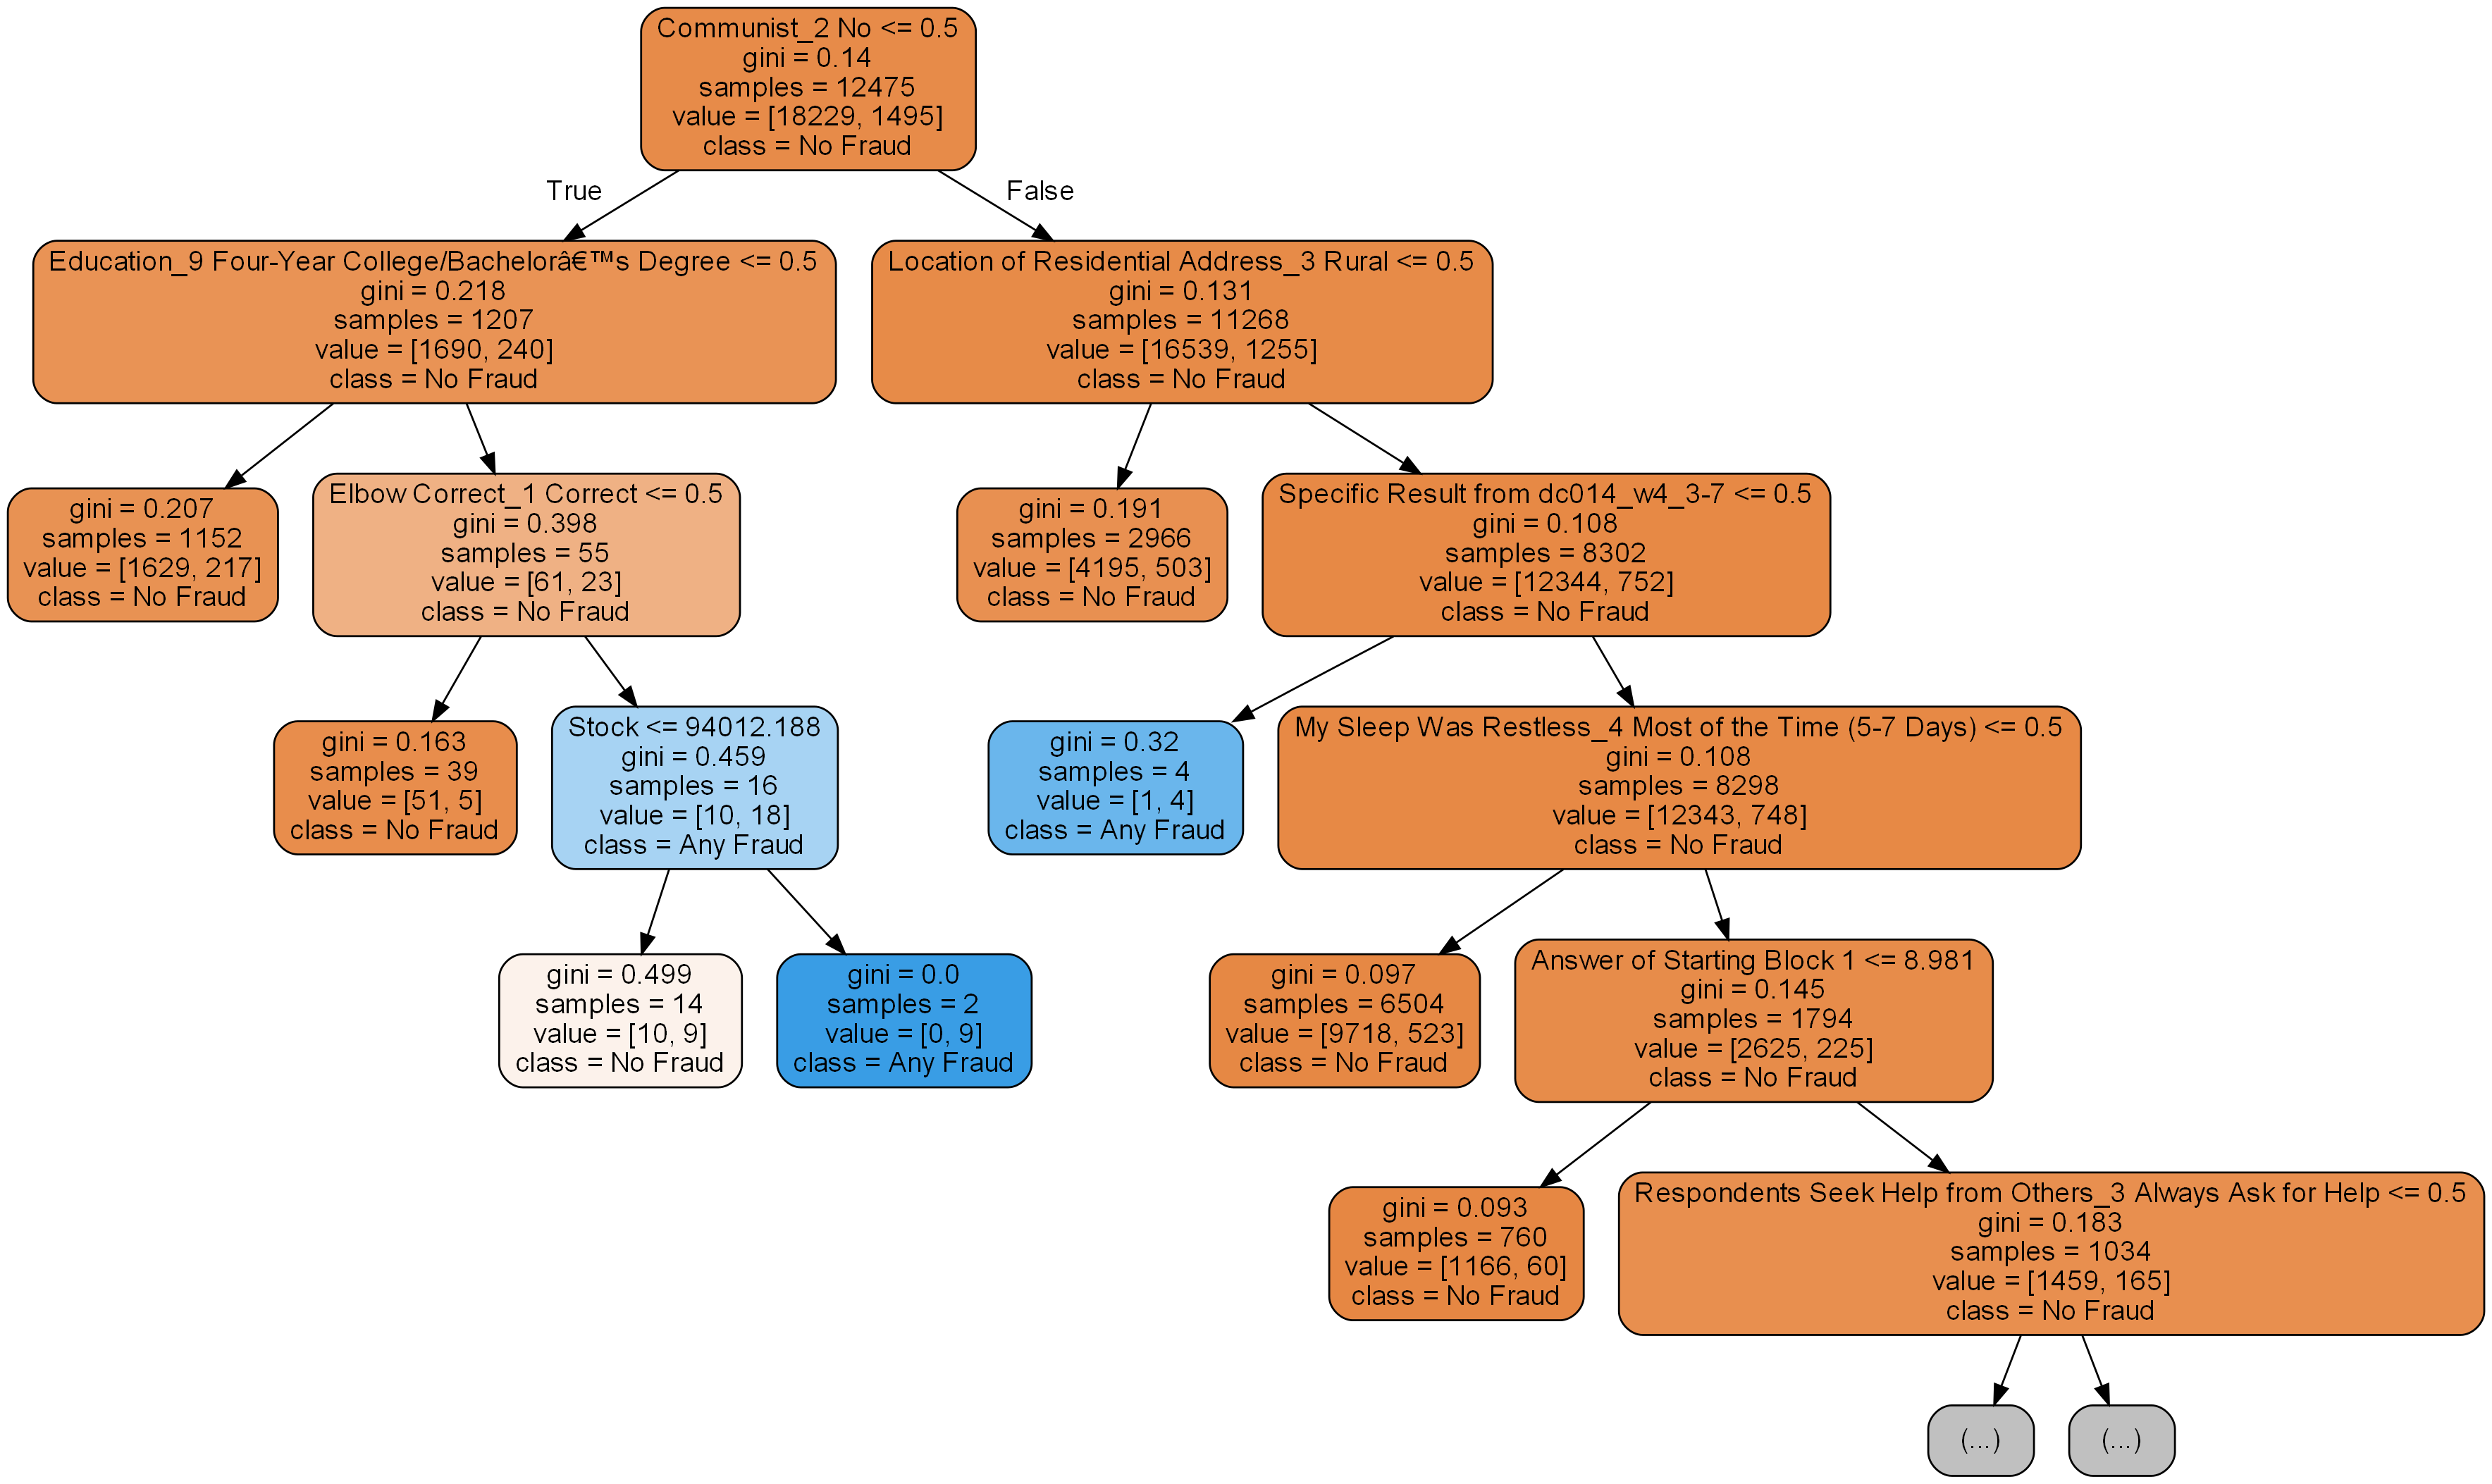

In [56]:
call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest.png', '-Gdpi=200'])
Image('tree_from_optimized_forest.png')

This tree is a little simpler than the solitary decision tree model. Random search found that limiting the maximum depth of the trees in the forest delivers better performance than letting them expand as far as needed.